In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_cherry_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        43.9360 (30.0948, 60.0573) (29.3405, 59.1513) 29.8109 (Jnode 202)\n',
 't_n104        41.5983 (28.2670, 57.1193) (27.6583, 56.3755) 28.7172 (Jnode 201)\n',
 't_n105        40.9852 (27.7980, 56.3251) (27.0641, 55.4598) 28.3957 (Jnode 200)\n',
 't_n106        38.4245 (25.8322, 53.0748) (25.2176, 52.3350) 27.1174 (Jnode 199)\n',
 't_n107        37.7478 (25.3099, 52.2210) (24.6132, 51.3933) 26.7801 (Jnode 198)\n',
 't_n108        36.0365 (23.9895, 50.0859) (23.3626, 49.3250) 25.9624 (Jnode 197)\n',
 't_n109        26.6104 (17.0153, 37.9781) (16.5897, 37.4170) 20.8273 (Jnode 196)\n',
 't_n110        26.4579 (16.9099, 37.7684) (16.3636, 37.0964) 20.7329 (Jnode 195)\n',
 't_n111        25.9787 (16.5702, 37.1212) (16.0728, 36.4959) 20.4230 (Jnode 194)\n',
 't_n112        25.3415 (16.1151, 36.2770) (15.6373, 35.6753) 20.0380 (Jnode 193)\n',
 't_n113        24.3969 (15.4336, 35.0324) (14.9353, 34.4407) 19.5055 (Jnode 192)\n',
 't_n114        20.6919 (12.6100, 30.3158) (12.2049, 2

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[43.936,
 41.5983,
 40.9852,
 38.4245,
 37.7478,
 36.0365,
 26.6104,
 26.4579,
 25.9787,
 25.3415,
 24.3969,
 20.6919,
 14.3979,
 11.7119,
 14.1662,
 18.8732,
 15.5671,
 25.0722,
 11.444,
 18.1707,
 15.7016,
 8.5867,
 13.764,
 23.4162,
 22.1369,
 11.9745,
 25.6158,
 23.9241,
 16.659,
 14.6456,
 19.0906,
 14.355,
 12.2643,
 15.2329,
 34.4281,
 24.0158,
 36.428,
 33.5349,
 28.8166,
 24.16,
 19.0907,
 22.0756,
 17.9646,
 12.9806,
 11.0328,
 31.3077,
 29.0,
 17.5715,
 10.4375,
 39.7764,
 35.8563,
 24.413,
 16.9332,
 30.3661,
 14.3759,
 23.3647,
 13.8686,
 40.9453,
 38.0669,
 29.9049,
 19.6252,
 17.8615,
 15.2314,
 12.3452,
 31.3304,
 17.7852,
 25.1554,
 30.6038,
 29.7701,
 29.3236,
 28.3192,
 26.5804,
 25.8937,
 25.2167,
 24.2832,
 22.6091,
 20.5324,
 14.3954,
 18.1209,
 13.4045,
 12.4733,
 12.2424,
 24.4386,
 22.6278,
 21.6754,
 18.9533,
 12.7832,
 22.0162,
 19.2218,
 12.7431,
 25.8066,
 23.859,
 16.0642,
 14.9942,
 4.2702,
 14.6309,
 18.911,
 16.6926,
 9.494,
 29.9492,
 17.8468]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_cherry_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[41.9925,
 38.8432,
 37.8174,
 35.4122,
 34.478,
 32.2124,
 24.1049,
 23.8929,
 23.0081,
 22.0523,
 21.08,
 17.5885,
 11.7679,
 8.7541,
 11.6111,
 16.2718,
 12.8693,
 21.7944,
 9.3187,
 15.3291,
 12.9022,
 6.6301,
 11.1978,
 20.5251,
 19.0944,
 10.4738,
 22.8342,
 21.0456,
 14.5744,
 12.168,
 16.3573,
 11.888,
 9.9276,
 13.1591,
 29.7127,
 21.3695,
 32.8095,
 29.8166,
 25.6168,
 20.8,
 15.7438,
 19.2837,
 15.2934,
 10.6046,
 8.741,
 27.5185,
 24.9653,
 14.3834,
 7.87,
 35.8167,
 31.3726,
 21.6248,
 14.0917,
 26.83,
 11.9139,
 19.7812,
 11.2093,
 38.1469,
 35.0388,
 27.1616,
 17.5612,
 15.6766,
 12.7845,
 10.1539,
 29.2847,
 15.3449,
 22.4474,
 30.6879,
 29.2753,
 28.1166,
 26.884,
 24.8573,
 23.9801,
 22.9884,
 21.8692,
 19.9249,
 17.3444,
 11.9097,
 15.9798,
 11.4693,
 10.1426,
 10.1862,
 21.6575,
 19.6573,
 18.5771,
 15.9384,
 10.2802,
 18.8385,
 16.1946,
 10.3316,
 23.6295,
 21.3074,
 14.2061,
 12.6955,
 4.0103,
 12.7101,
 18.1936,
 15.4368,
 9.0601,
 29.5921,
 16.2149]

In [12]:
posterior_mean_iqtree

[43.936,
 41.5983,
 40.9852,
 38.4245,
 37.7478,
 36.0365,
 26.6104,
 26.4579,
 25.9787,
 25.3415,
 24.3969,
 20.6919,
 14.3979,
 11.7119,
 14.1662,
 18.8732,
 15.5671,
 25.0722,
 11.444,
 18.1707,
 15.7016,
 8.5867,
 13.764,
 23.4162,
 22.1369,
 11.9745,
 25.6158,
 23.9241,
 16.659,
 14.6456,
 19.0906,
 14.355,
 12.2643,
 15.2329,
 34.4281,
 24.0158,
 36.428,
 33.5349,
 28.8166,
 24.16,
 19.0907,
 22.0756,
 17.9646,
 12.9806,
 11.0328,
 31.3077,
 29.0,
 17.5715,
 10.4375,
 39.7764,
 35.8563,
 24.413,
 16.9332,
 30.3661,
 14.3759,
 23.3647,
 13.8686,
 40.9453,
 38.0669,
 29.9049,
 19.6252,
 17.8615,
 15.2314,
 12.3452,
 31.3304,
 17.7852,
 25.1554,
 30.6038,
 29.7701,
 29.3236,
 28.3192,
 26.5804,
 25.8937,
 25.2167,
 24.2832,
 22.6091,
 20.5324,
 14.3954,
 18.1209,
 13.4045,
 12.4733,
 12.2424,
 24.4386,
 22.6278,
 21.6754,
 18.9533,
 12.7832,
 22.0162,
 19.2218,
 12.7431,
 25.8066,
 23.859,
 16.0642,
 14.9942,
 4.2702,
 14.6309,
 18.911,
 16.6926,
 9.494,
 29.9492,
 17.8468]

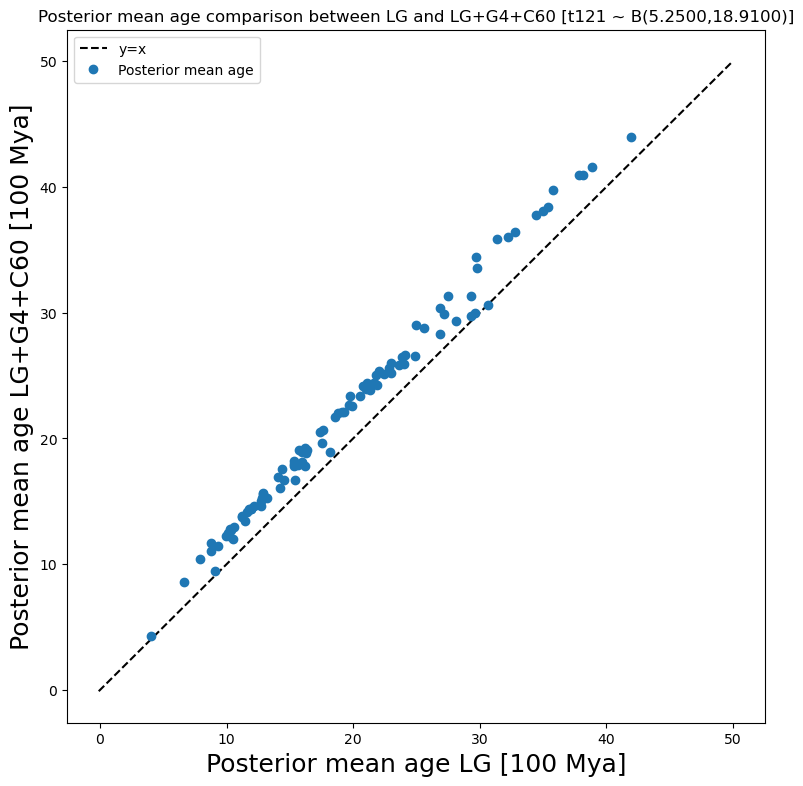

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 [t121 ~ B(5.2500,18.9100)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_cherry_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')